<a href="https://colab.research.google.com/github/JebaMercy14/Time-Series-Algorithms/blob/main/Business_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Packages

In [1]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

# Loading Dataset

In [4]:
data = pd.read_csv("/content/adidas-quarterly-sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


# Data Visualization

In [5]:
import plotly.express as px
figure = px.line(data, x="Time Period", 
                 y="Revenue", 
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

<ipython-input-6-02799882c189>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



<Figure size 432x288 with 0 Axes>

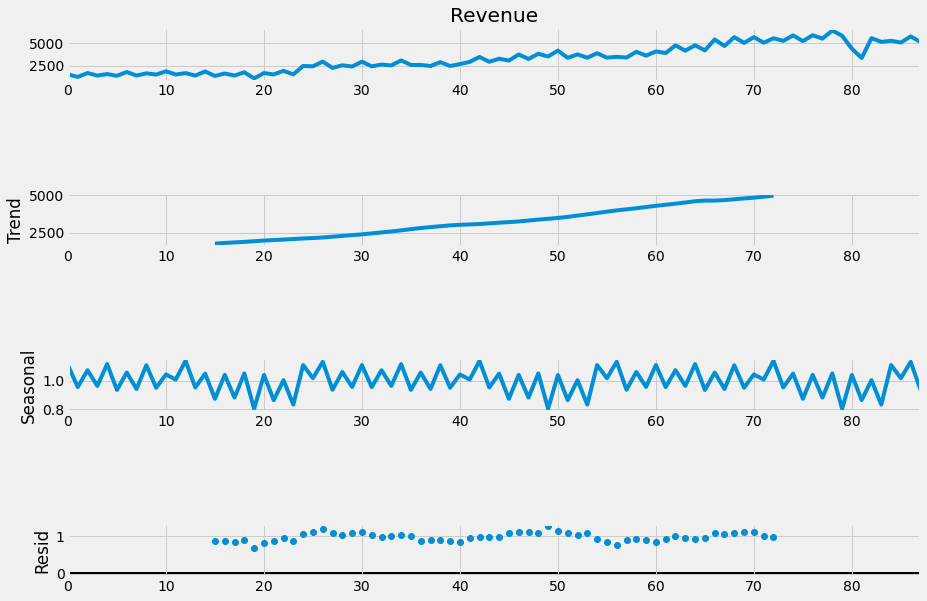

In [6]:
result = seasonal_decompose(data["Revenue"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

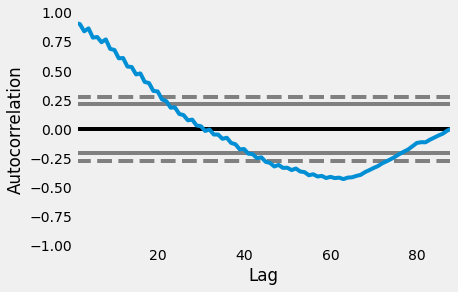

In [7]:
pd.plotting.autocorrelation_plot(data["Revenue"])

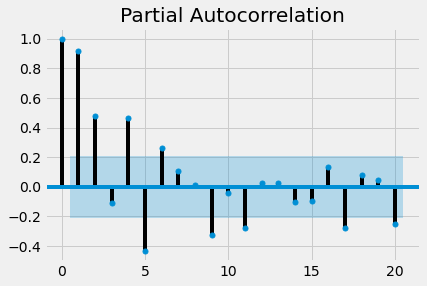

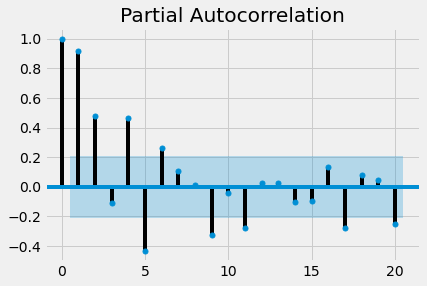

In [8]:
plot_pacf(data["Revenue"], lags = 20)

# SARIMA model

In [9]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Revenue'],order=(p, d, q),seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Thu, 23 Feb 2023   AIC                           1127.041
Time:                                    04:49:09   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5800      0.386     -4.096      0.000      -2.336      -0.824
ar.L2         -1.4326      0.581   

# Forecasting

In [10]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.673006
89    5186.055688
90    6293.162516
91    5751.706662
92    5911.690122
93    5499.845835
94    6389.418331
95    5728.567026
Name: predicted_mean, dtype: float64


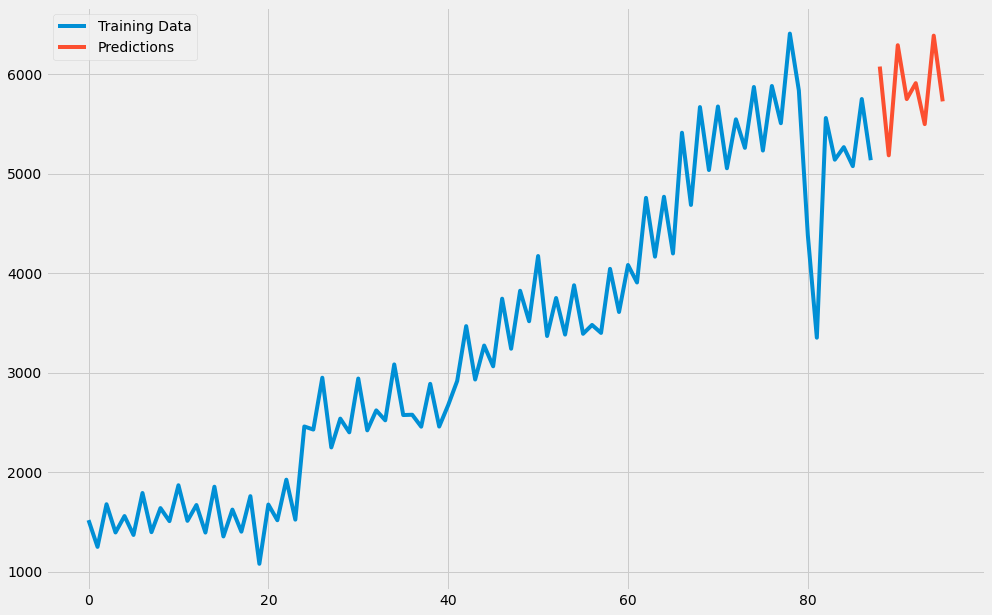

In [11]:
data["Revenue"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")